In [72]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/dinaldoap/jit-sdp-data/master/brackets.csv')
df.head()

,commit_hash,author_name,author_date_unix_timestamp,author_email,author_date,commit_message,fix,classification,linked,contains_bug,...,nuc,exp,rexp,sexp,glm_probability,rf_probability,repository_id,issue_id,issue_date,issue_type
0,5f406086936d2abf1392b0f77db246b308715d6d,Narayani,1574927837,narayani@adobe.com,Thu Nov 28 13:27:17 2019 +0530,Merge pull request #14985 from adobe/alf_local...,NaN,Merge,False,False,...,0.0,0.0,0.000000,0.0,0.173803,0.000,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
1,95626cc3650dcd00e886670d80307b8f710d6168,walf,1574926230,walf@adobe.com,Wed Nov 27 23:30:30 2019 -0800,Updated by ALF automation.,False,None,False,False,...,1.0,9.0,1.075033,8.0,0.464372,0.286,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
2,8f26cd850e648d6c4dd04cdfa69119a7feda0867,walf,1574915324,walf@adobe.com,Wed Nov 27 20:28:44 2019 -0800,Updated by ALF automation.,False,None,False,False,...,1.0,8.0,0.075033,7.0,0.459778,0.302,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
3,a7dda4aeab550d36bc2c0ca4ecfc29efda21f9ea,Narayani,1574757872,narayani@adobe.com,Tue Nov 26 14:14:32 2019 +0530,Merge pull request #14729 from adobe/alf_local...,NaN,Merge,False,False,...,0.0,0.0,0.000000,0.0,0.173803,0.000,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
4,8a806ec41b613d70b26005e2c4907b021a41e744,Gautam Jha,1574315174,gjha@adobe.com,Thu Nov 21 11:16:14 2019 +0530,Moving command line port validation errors to ...,False,None,False,False,...,2.0,4.0,2.500000,2.0,0.640227,0.496,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN


In [74]:
df_preprocess = df.copy()
label_col = 'contains_bug'
features_cols = ['fix']
preprocess_cols = ['commit_message'] + features_cols + [label_col]
df_preprocess = df[preprocess_cols].copy()
# filter rows with missing data 
df_preprocess = df_preprocess.dropna(subset=['fix'])
df_preprocess.head()


,commit_message,fix,contains_bug
1,Updated by ALF automation.,False,False
2,Updated by ALF automation.,False,False
4,Moving command line port validation errors to ...,False,False
5,Finalizing strings for gkit (#14976),False,False
6,Remove space between localhost: and port in in...,False,False


In [75]:
def filter_commits(data, contains_bug):
    return data[data['contains_bug'] == contains_bug]

In [76]:
df_bug = filter_commits(df_preprocess, 1)
df_normal = filter_commits(df_preprocess, 0)
print(df_bug.head())
print(df_normal.head())

commit_message   fix  contains_bug
18  ALF Automation (#14721) * Updated by ALF autom...  True          True
19  ALF Automation (#14702) * Updated by ALF autom...  True          True
23  LSP Find References Feature (#14693) * LSP Fin...  True          True
24  Capability to Support Document & Project Symbo...  True          True
25  Adding Code Hints Description Box for handling...  True          True
                                      commit_message    fix  contains_bug
1                        Updated by ALF automation.   False         False
2                        Updated by ALF automation.   False         False
4  Moving command line port validation errors to ...  False         False
5              Finalizing strings for gkit (#14976)   False         False
6  Remove space between localhost: and port in in...  False         False


In [77]:
def extract_text(data):
    text = [message for message in data['commit_message']]
    return " ".join(text)

In [78]:
text_bug = extract_text(df_bug)
text_normal = extract_text(df_normal)
print(text_bug[:100])
print(text_normal[:100])

ALF Automation (#14721) * Updated by ALF automation.

* Fixing the LANGUAGE_TOOLS_PREFERENCES key 
Updated by ALF automation.  Updated by ALF automation.  Moving command line port validation errors t


In [79]:
def plot_wordcloud(data):
    '''
    data: str with text or iterable with (name, frequency)
    '''
    stopwords = set(STOPWORDS)
    #stopwords.update(['Add', 'Added', 'Update', 'Updated', 'change', 'Remove', 'Fix', 'ALF', 'use', 'file'])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', random_state=42)
    
    if type(data) == str:
        wordcloud = wordcloud.generate(data)
    else:
        wordcloud = wordcloud.generate_from_frequencies(data)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

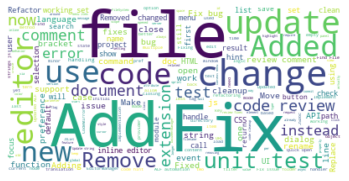

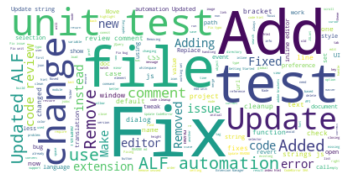

In [80]:
plot_wordcloud(text_bug)
plot_wordcloud(text_normal)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(df_preprocess['commit_message'])
print(vectorizer.get_feature_names())

rolldeltay', 'scrolled', 'scroller', 'scrollershadow', 'scrollershadows', 'scrolling', 'scrollingup', 'scrollintoview', 'scrollintoviewifneeded', 'scrollpos', 'scrolls', 'scrollto', 'scrolltop', 'scrolltrackmarkers', 'scrollwheel', 'scrollwidth', 'scrub', 'scrubbed', 'scss', 'sd', 'sdf', 'seach', 'search', 'searchandshowresults', 'searchbackwards', 'searchcursor', 'searched', 'searches', 'searchhistory', 'searching', 'searchmodel', 'searchpanel', 'searchresult', 'searchresultsview', 'searchstate', 'searchtimeout', 'searchtimeoutid', 'searhc', 'sebastian', 'sebelum', 'sec', 'second', 'secondary', 'seconds', 'secs', 'section', 'sectionitems', 'sections', 'secure', 'security', 'security_err', 'securityerror', 'seed', 'seeing', 'seelcted', 'seemingly', 'seen', 'sees', 'segment', 'segmentedsearch', 'segments', 'segu', 'selction', 'select', 'selectability', 'selectable', 'selectallnoscroll', 'selected', 'selectedcolors', 'selectednode', 'selecting', 'selection', 'selectionchanged', 'selectio

In [82]:
df_freq = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df_preprocess.index)
df_freq = pd.concat([df_freq, df_preprocess[['contains_bug']]], axis='columns')
df_freq.head()

,000,01,02,04b015e9d18a44b1f27c889c12d36b8abacc06cc,06,07,0700,077e10dc6021d7d3e162c9854f9b386312e7a8d0,09,0_fix_1,...,کردن,کرده,یعقوبی,尝试,异常,文件夹,目录,试图,错误,contains_bug
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [83]:
def filter_drop(data, contains_bug):
    return filter_commits(data, contains_bug).drop(['contains_bug'], axis='columns')

In [84]:
df_freq_bug = filter_drop(df_freq, 1)
df_freq_normal = filter_drop(df_freq, 0)
print(df_freq_bug.mean().head())
print(df_freq_normal.mean().head())

000                                         0.000102
01                                          0.000007
02                                          0.000007
04b015e9d18a44b1f27c889c12d36b8abacc06cc    0.000000
06                                          0.000007
dtype: float64
000                                         0.000133
01                                          0.000051
02                                          0.000000
04b015e9d18a44b1f27c889c12d36b8abacc06cc    0.000018
06                                          0.000000
dtype: float64


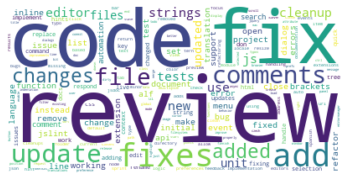

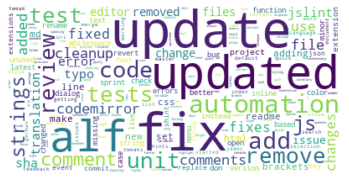

In [85]:
plot_wordcloud(df_freq_bug.mean())
plot_wordcloud(df_freq_normal.mean())

In [86]:
from scipy.stats import ttest_ind
statistics = []
for column in df_freq_bug.columns:
    statistic, pvalue = ttest_ind(df_freq_bug[column], df_freq_normal[column], equal_var=False)
    statistics.append(statistic)
sr_diff = pd.Series(statistics, index=df_freq_bug.columns)
print(sr_diff.head())

000                                        -0.230993
01                                         -0.853436
02                                          1.000000
04b015e9d18a44b1f27c889c12d36b8abacc06cc   -1.000000
06                                          1.000000
dtype: float64


In [87]:
sr_diff.sort_values(ascending=False)

refactor       6.111667
review         6.093874
open           5.805709
api            5.804187
new            5.658804
                ...    
readme        -8.953644
codemirror   -10.879257
updated      -10.880948
automation   -11.065219
alf          -11.138050
Length: 9217, dtype: float64

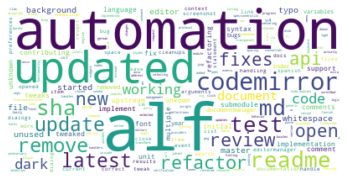

In [88]:
plot_wordcloud(sr_diff.abs())